# W06 - clean data + scipy + ML 

In [6]:
import  pandas as pd 
import  scipy.stats

In [7]:
!  pip  install scipy  scikit-learn 

In [8]:
fulldata = pd.read_csv("w05-fulldata.csv", delimiter=" ") 

In [9]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [10]:
fulldata.dropna(inplace=True)

In [11]:
fulldata.columns

Index(['Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [21]:
fulldata.Date = pd.to_datetime(fulldata.Date)

In [14]:
fulldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  29 non-null     int64  
 1   Date      29 non-null     object 
 2   Pulse     29 non-null     int64  
 3   Maxpulse  29 non-null     int64  
 4   Calories  29 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [22]:
fulldata.Date 

0    2020-12-01
1    2020-12-02
2    2020-12-03
3    2020-12-04
4    2020-12-05
5    2020-12-06
6    2020-12-07
7    2020-12-08
8    2020-12-09
9    2020-12-10
10   2020-12-11
11   2020-12-12
12   2020-12-12
13   2020-12-13
14   2020-12-14
15   2020-12-15
16   2020-12-16
17   2020-12-17
19   2020-12-19
20   2020-12-20
21   2020-12-21
23   2020-12-23
24   2020-12-24
25   2020-12-25
26   2020-12-26
27   2020-12-27
29   2020-12-29
30   2020-12-30
31   2020-12-31
Name: Date, dtype: datetime64[ns]

In [16]:
fulldata.dropna(subset=['Date'], inplace = True)

In [17]:
fulldata.loc[7, 'Duration']

450

In [18]:
fulldata.loc[7, 'Duration'] = 45

In [19]:
fulldata.loc[26, 'Date'] = "'" + fulldata.loc[26, 'Date'] + "'" 
fulldata.loc[26, 'Date']

"'2020/12/26'"

In [20]:
fulldata.loc[1, 'Date']

"'2020/12/02'"

In [23]:
fulldata.Duration [fulldata.Duration ==60] =61

C:\Users\quach\AppData\Local\Temp\ipykernel_1568\550453116.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  fulldata.Duration [fulldata.Duration ==60] =61
C:\Users\quach\AppData\Local\Temp\ipykernel_1568\550453116.py:1: SettingWithCopyWar

In [24]:
fulldata.Duration

0     61
1     61
2     61
3     45
4     45
5     61
6     61
7     45
8     30
9     61
10    61
11    61
12    61
13    61
14    61
15    61
16    61
17    61
19    61
20    45
21    61
23    61
24    45
25    61
26    61
27    61
29    61
30    61
31    61
Name: Duration, dtype: int64

In [25]:
duration = fulldata.Duration

In [29]:
duration

0     61
1     61
2     61
3     45
4     45
5     61
6     61
7     45
8     30
9     61
10    61
11    61
12    61
13    61
14    61
15    61
16    61
17    61
19    61
20    45
21    61
23    61
24    45
25    61
26    61
27    61
29    61
30    61
31    61
Name: Duration, dtype: int64

In [31]:
duration.duplicated()

0     False
1      True
2      True
3     False
4      True
5      True
6      True
7      True
8     False
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
19     True
20     True
21     True
23     True
24     True
25     True
26     True
27     True
29     True
30     True
31     True
Name: Duration, dtype: bool

In [33]:
duration.drop_duplicates()

0    61
3    45
8    30
Name: Duration, dtype: int64

In [34]:
fulldata.corr()

,Duration,Date,Pulse,Maxpulse,Calories
Duration,1.000000,0.210330,-0.191135,-0.403622,0.328600
Date,0.210330,1.000000,-0.370432,-0.534507,-0.352105
Pulse,-0.191135,-0.370432,1.000000,0.211055,0.510361
Maxpulse,-0.403622,-0.534507,0.211055,1.000000,0.352529
Calories,0.328600,-0.352105,0.510361,0.352529,1.000000


In [35]:
import matplotlib.pyplot as plot

<Axes: xlabel='Pulse', ylabel='Calories'>

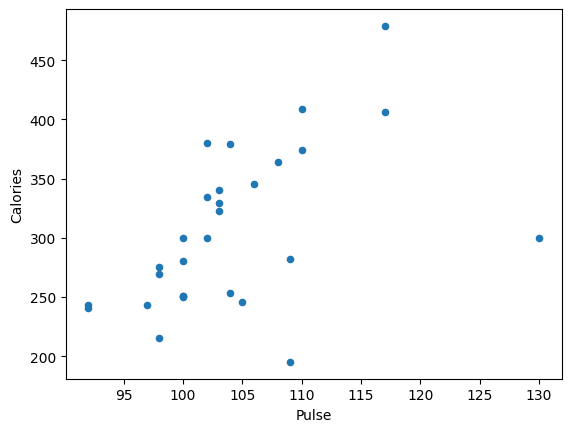

In [37]:
fulldata.plot.scatter(x="Pulse",y="Calories")

<Axes: xlabel='Pulse', ylabel='Calories'>

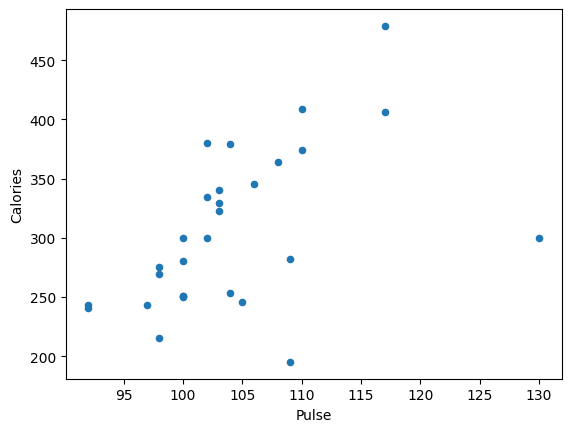

In [38]:
fulldata.plot(kind="scatter",x="Pulse",y="Calories")

# Scipy

In [39]:
from scipy import constants, stats

In [43]:
constants.carat

0.0002

In [44]:
from scipy.optimize import root
from math import cos

In [47]:
def eqn(x):
    return x*300 -x*100 - 30000

myroot=root(eqn,0)
myroot

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 1.500e+02]
  method: hybr
    nfev: 13
    fjac: [[-1.000e+00]]
       r: [-2.000e+02]
     qtf: [ 4.500e+03]

# DATA SCIENCE

In [55]:
x =fulldata["Calories"]
y= fulldata["Duration"]
x,y

(0     409.1
 1     479.0
 2     340.0
 3     282.4
 4     406.0
 5     300.0
 6     374.0
 7     253.3
 8     195.1
 9     269.0
 10    329.3
 11    250.7
 12    250.7
 13    345.3
 14    379.3
 15    275.0
 16    215.2
 17    300.0
 19    323.0
 20    243.0
 21    364.2
 23    300.0
 24    246.0
 25    334.5
 26    250.0
 27    241.0
 29    280.0
 30    380.3
 31    243.0
 Name: Calories, dtype: float64,
 0     61
 1     61
 2     61
 3     45
 4     45
 5     61
 6     61
 7     45
 8     30
 9     61
 10    61
 11    61
 12    61
 13    61
 14    61
 15    61
 16    61
 17    61
 19    61
 20    45
 21    61
 23    61
 24    45
 25    61
 26    61
 27    61
 29    61
 30    61
 31    61
 Name: Duration, dtype: int64)

In [56]:
a,b,_,_,_=stats.linregress(x,y)

In [57]:
x.max(), y.max()

(479.0, 61)

In [61]:
def  calories(x):
    return a*x+b

In [62]:
calories(600)

68.80113425557359

In [103]:
import numpy as np
xPredict = np.linspace(30,60,100)
yPredict = calories(xPredict)
#list(map(calories,xPredict))
plt.scatter(x,y)
plt.plot(xPredict,yPredict,'r')

NameError: name 'plt' is not defined